In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$\dfrac{d^2 r }{d t^2} = - \dfrac{GMr}{(r^2 + a^2)^{3/2}}$

In [100]:
h=0.01
min_t = 0.0
max_t = 260.0
n_points = int((max_t-min_t)/h)
t = zeros(n_points)
x = zeros(n_points)
vx = zeros(n_points)
y = zeros(n_points)
vy = zeros(n_points)
z = zeros(n_points)
vz = zeros(n_points)

In [106]:
def velocity_x(t, x, vx):
    return vx

def velocity_y(t, y, vy):
    return vy

def velocity_z(t, z, vz):
    return vz

def position_x(t, x, y, z, vx):
    a = 1. # Scale length
    return -x / (x**2  + y**2 + z**2 + a**2)**(3/2.0)

def position_y(t, x, y, z, vy):
    a = 1. # Scale length
    return -y / (x**2 + y**2 + z**2 + a**2)**(3/2.0)

def position_z(t, x, y, z, vz):
    a = 1. # Scale length
    return -z / (x**2 + y**2 + z**2 + a**2)**(3/2.0)


In [107]:
t[0] = min_t
x[0] = 2.5 # Distance 
y[0] = 2.5 # Distance 
z[0] = 2.5 # Distance 

vx[0] = 0.0 # velocity 
vy[0] = 0.0 # velocity 
vz[0] = 0.0 # velocity 

t[1] = min_t + h
x[1] = x[0] + h*velocity_x(t[0], x[0], vx[0])
y[1] = y[0] + h*velocity_y(t[0], y[0], vy[0])
z[1] = z[0] + h*velocity_z(t[0], z[0], vz[0])

vx[1] = vx[0] + h*position_x(t[0], x[0], y[0], z[0], vx[0])
vy[1] = vy[0] + h*position_y(t[0], x[0], y[0], z[0], vy[0])
vz[1] = vz[0] + h*position_z(t[0], x[0], y[0], z[0], vz[0])

for i in range(2,n_points):
    t[i] = t[i-1] + h
    
    x[i] = x[i-2] + 2 * h * velocity_x(t[i-1], x[i-1], vx[i-1])
    y[i] = y[i-2] + 2 * h * velocity_y(t[i-1], y[i-1], vy[i-1])
    z[i] = z[i-2] + 2 * h * velocity_z(t[i-1], z[i-1], vz[i-1])
    
    vx[i] = vx[i-2] + 2 * h * position_x(t[i-1], x[i-1], y[i-1], z[i-1], vx[i-1])
    vy[i] = vy[i-2] + 2 * h * position_y(t[i-1], x[i-1], y[i-1], z[i-1], vy[i-1])
    vz[i] = vz[i-2] + 2 * h * position_z(t[i-1],x[i-1], y[i-1], z[i-1], vz[i-1])

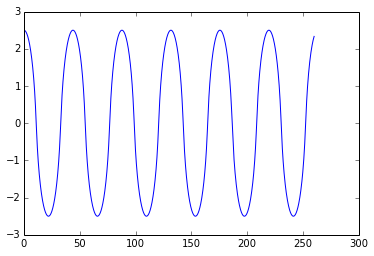

In [108]:
plot(t, x)